# Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd


behaviors_data = pd.read_csv('./MINDsmall_train/behaviors.tsv', delimiter='\t', header=None)
behaviors_data.head()

# Expanding the history and impressions into lists
behaviors_data['History'] = behaviors_data[3].apply(lambda x: x.split() if pd.notnull(x) else [])
behaviors_data['Impressions'] = behaviors_data[4].apply(lambda x: x.split() if pd.notnull(x) else [])

# Count of articles interacted with per user
user_interactions_count = behaviors_data.groupby(1).apply(lambda x: pd.Series({
    'Total Articles Interacted': sum(len(h) + len(i) for h, i in zip(x['History'], x['Impressions'])),
    'Average Session Length': x.apply(lambda row: len(row['History']) + len(row['Impressions']), axis=1).mean()
}))

user_interactions_count.head()


,Total Articles Interacted,Average Session Length
1,,
U100,115.0,115.000000
U1000,214.0,71.333333
U10001,114.0,57.000000
U10003,122.0,61.000000
U10008,95.0,95.000000


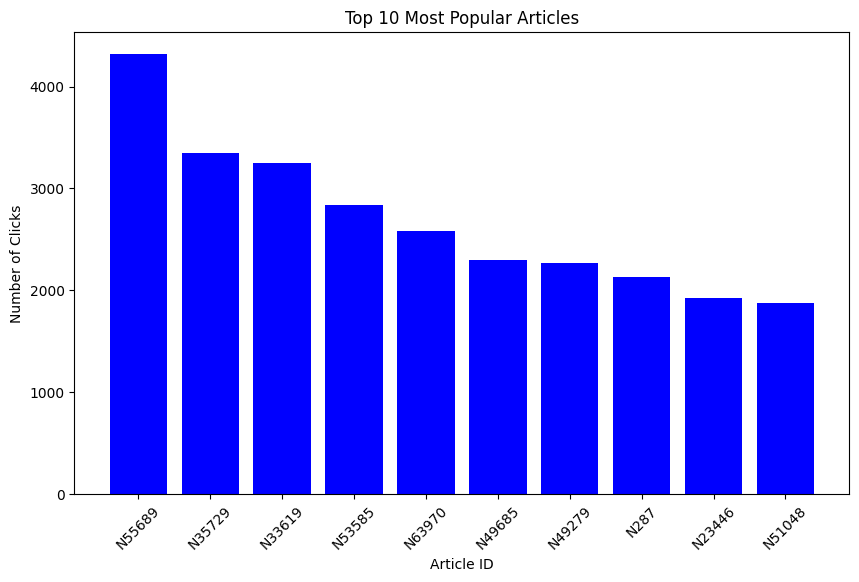

"name 'plt' is not defined"

In [5]:
# Top 10 most popular articles

from matplotlib import pyplot as plt

try:
    # The impressions DataFrame 
    impressions_list = behaviors_data['Impressions'].explode().dropna().tolist()
    impressions_list = [x.split('-') for x in impressions_list if '-' in x]

    # Create DataFrame
    article_clicks_df = pd.DataFrame(impressions_list, columns=['ArticleID', 'Clicked'])
    article_clicks_df['Clicked'] = article_clicks_df['Clicked'].astype(int)

    # Calculate the total number of clicks for each article
    article_popularity = article_clicks_df.groupby('ArticleID')['Clicked'].sum().sort_values(ascending=False)

    # Select the top 10 articles for plotting
    top_10_articles = article_popularity.head(10)

    # Plotting the top 10 most popular articles
    plt.figure(figsize=(10, 6))
    plt.bar(top_10_articles.index, top_10_articles.values, color='blue')
    plt.xlabel('Article ID')
    plt.ylabel('Number of Clicks')
    plt.title('Top 10 Most Popular Articles')
    plt.xticks(rotation=45)
    plt.show()

except Exception as e:
    fix_error = str(e)

fix_error if 'fix_error' in locals() else "Plots created successfully."

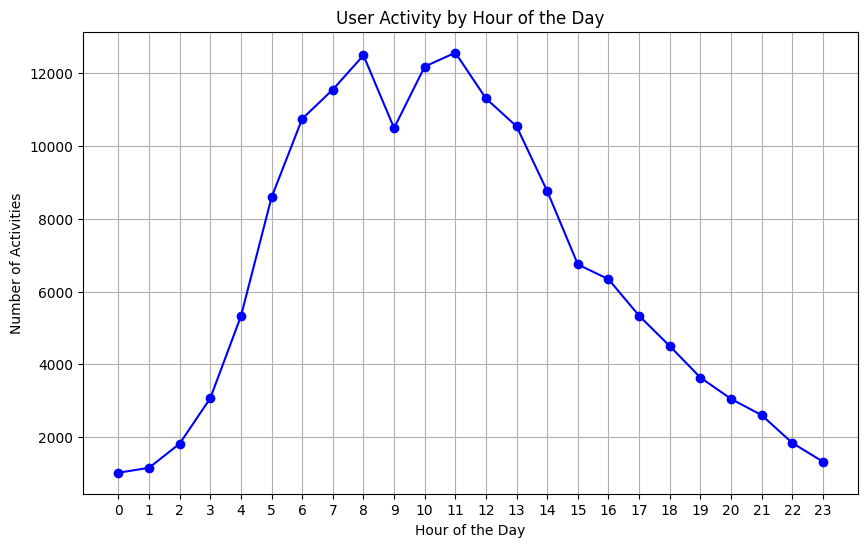

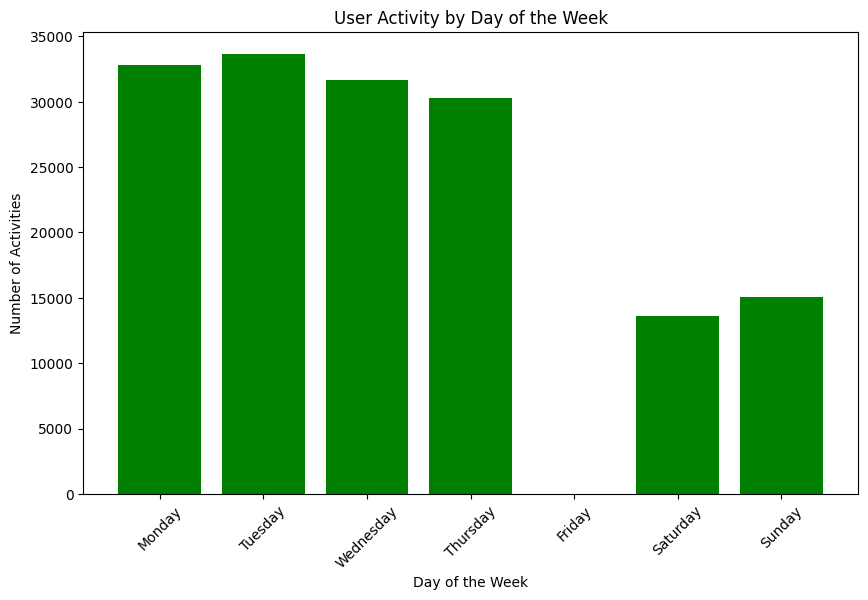

'Temporal pattern analysis plotted successfully.'

In [6]:
# Checks and preparing the data for temporal pattern analysis
try:
    # Ensuring the timestamp is correctly formatted as datetime
    behaviors_data[2] = pd.to_datetime(behaviors_data[2])

    # Extracting hour and day of week for analysis
    behaviors_data['Hour'] = behaviors_data[2].dt.hour
    behaviors_data['DayOfWeek'] = behaviors_data[2].dt.day_name()

    # Aggregating counts by hour and by day of the week
    hourly_activity = behaviors_data['Hour'].value_counts().sort_index()
    daily_activity = behaviors_data['DayOfWeek'].value_counts()

    # Plotting hourly activity
    plt.figure(figsize=(10, 6))
    plt.plot(hourly_activity.index, hourly_activity.values, marker='o', linestyle='-', color='blue')
    plt.title('User Activity by Hour of the Day')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Activities')
    plt.grid(True)
    plt.xticks(hourly_activity.index)  
    plt.show()

    # Plotting daily activity
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_activity = daily_activity.reindex(days_order)  

    plt.figure(figsize=(10, 6))
    plt.bar(daily_activity.index, daily_activity.values, color='green')
    plt.title('User Activity by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Activities')
    plt.xticks(rotation=45)
    plt.show()
except Exception as e:
    temporal_error = str(e)

temporal_error if 'temporal_error' in locals() else "Temporal pattern analysis plotted successfully."
